# Observation of all the effects 

The physical model used to describe this effect :

\begin{equation}
    \frac{\partial E}{\partial z} = \frac{i}{2k}\nabla^2_{\bot}E - \frac{\sigma}{2}(1 + i\omega\tau)\rho E - \frac{\beta^K}{2}\left|E\right|^{2K-2}E + i\frac{\omega}{c}(1-f)n_{2}\left|E\right|^2E
\end{equation}

We consider all the effects at the same time to see what happens to the laser:



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
#Parameter must be the same with the simulation file
L = 3*1e-3
N = 64
Lz = 10.
Nz = int(6000*Lz)
nb_save = 200

#Numerical solution
inten_num = np.loadtxt("../results/intensity_total.txt")
nb_pics = int((inten_num.shape[0]*inten_num.shape[1])/(2*N)**2)
inten_num = inten_num.reshape((nb_pics, 2*N, 2*N))

No handles with labels found to put in legend.
C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


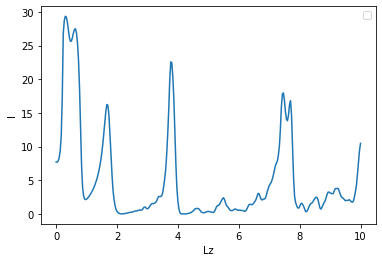

In [3]:
#Energy of the center of laser along z
list_e = []
num_point = inten_num.shape[0]
for i in range(num_point):
    list_e.append(inten_num[i][N][N])
screen = np.linspace(0, Lz, inten_num.shape[0])
list_e = np.asarray(list_e)

fig, ax = plt.subplots()
ax.plot(screen, list_e)
ax.set_xlabel('Lz')
ax.set_ylabel('I')
ax.legend()
#plt.xlim(0.007, 0.009)
fig.show()

C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


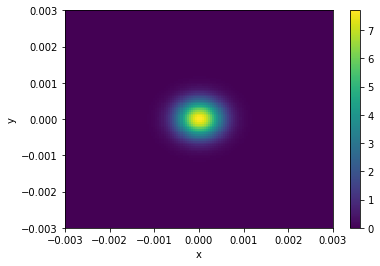

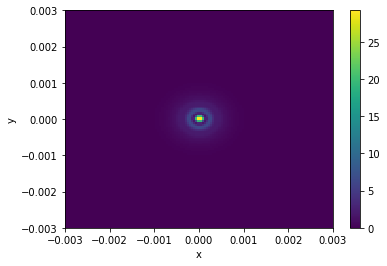

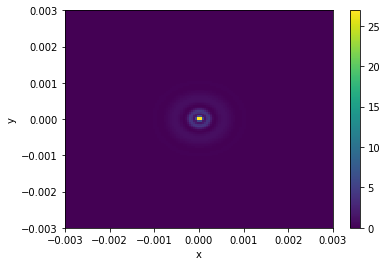

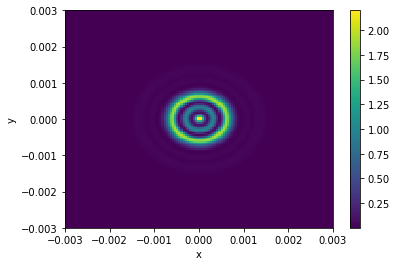

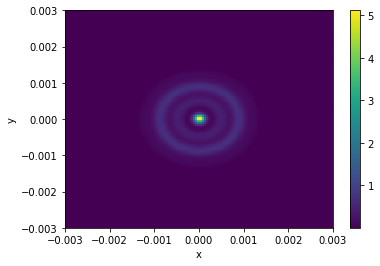

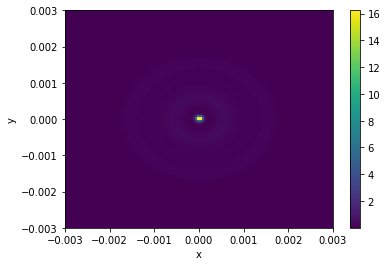

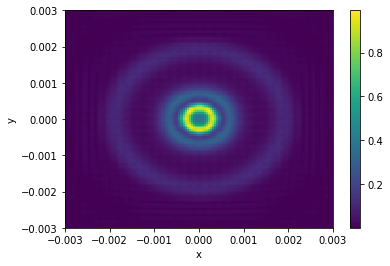

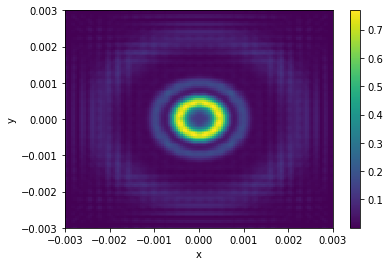

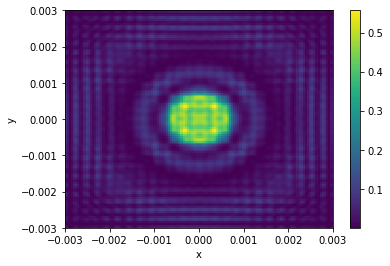

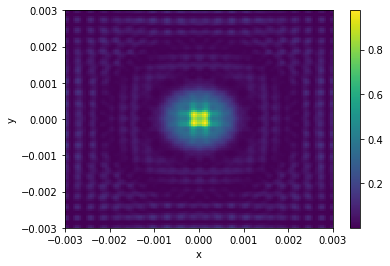

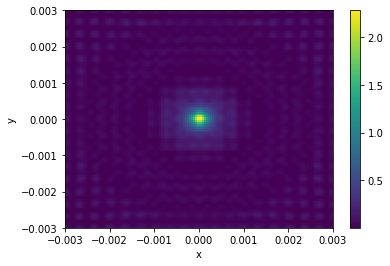

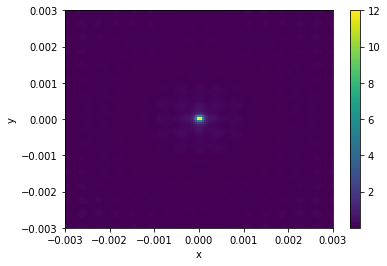

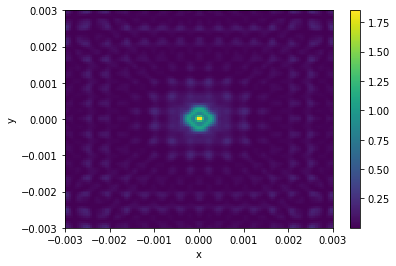

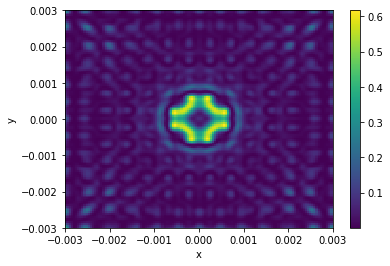

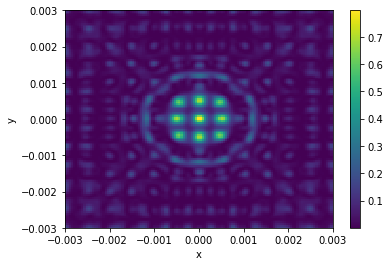

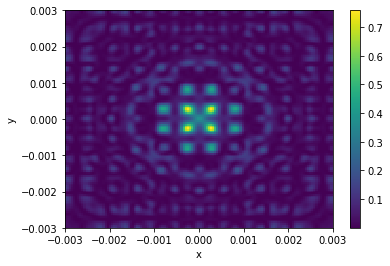

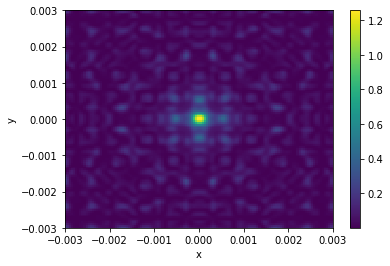

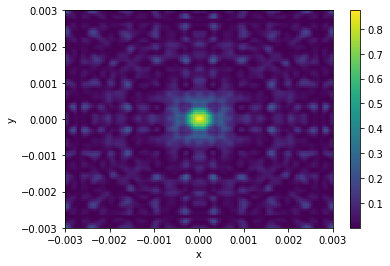

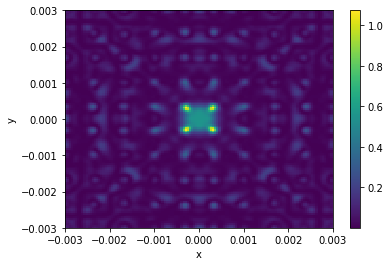

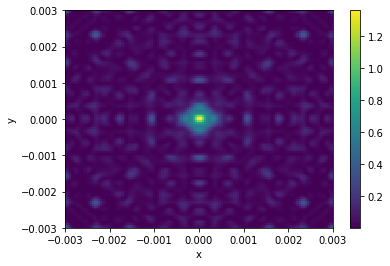

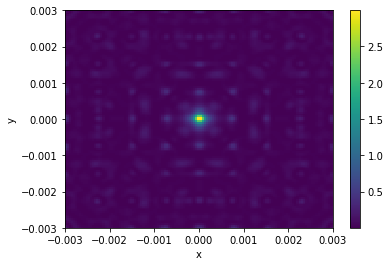

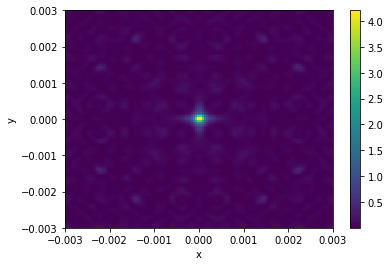

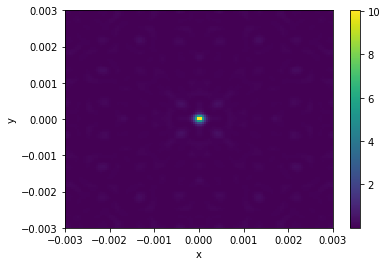

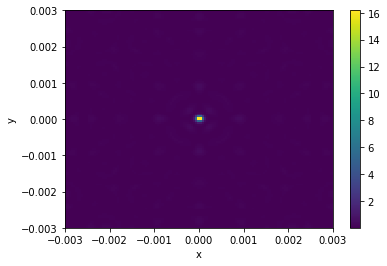

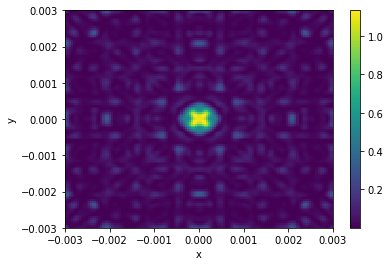

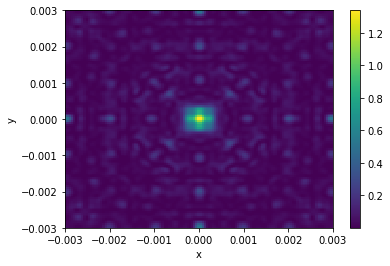

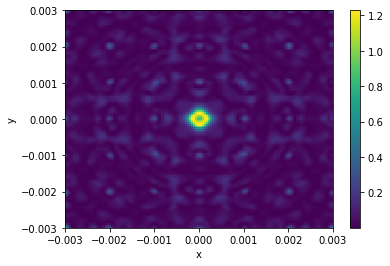

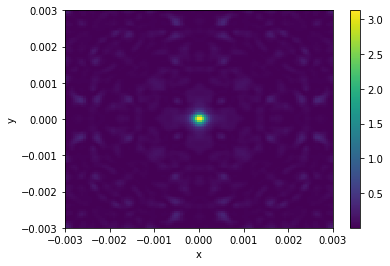

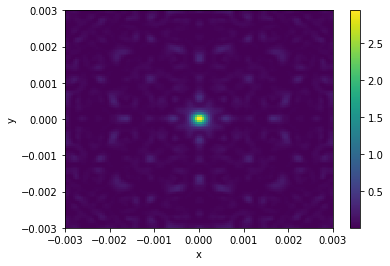

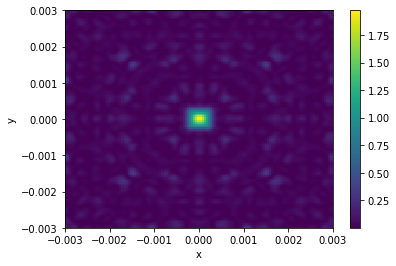

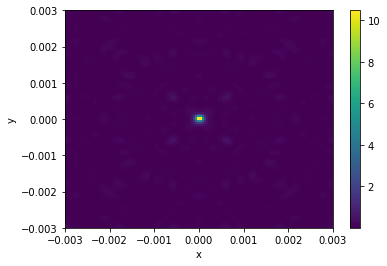

In [4]:
x = np.linspace(-L,L,2*N)
y = np.linspace(-L,L,2*N)
for i in range(inten_num.shape[0]):
    if (i%10 == 0):
        fig, ax = plt.subplots()
        mesh = ax.pcolormesh(x, y, inten_num[i])
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        plt.colorbar(mesh, ax=ax)
        fig.show()

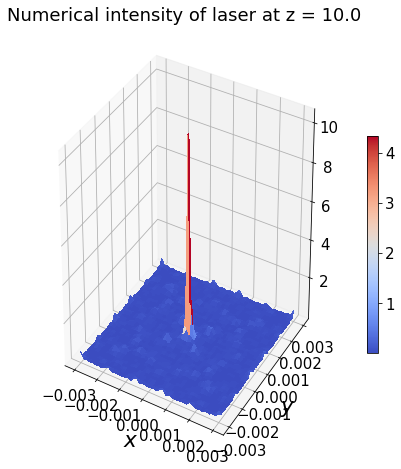

In [5]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 10.0

r, d = np.linspace(-L, L, 2*N, retstep=True) 
x, y = np.meshgrid(r,r)

#3D comparison between numerical and analytical solution at arbitary z
axes = []
surfs = []
fig = plt.figure(figsize=plt.figaspect(0.5))

N = inten_num.shape[0]
z = 10.0 
pic = int((N-1)/Lz*z)

ax = fig.add_subplot(121,projection='3d')
title = 'Numerical intensity of laser at z = ' + str(z)
ax.title.set_text(title)
#ax.set_zlim(0, 0.8)
#ax.set_xlim(-0.002, 0.002)
#ax.set_ylim(-0.002, 0.002)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
axes.append(ax)
surf = ax.plot_surface(x,y,inten_num[pic],cmap=cm.coolwarm, linewidth=0, antialiased=False)

fig.colorbar(surf, ax=axes,shrink=0.5, aspect=20)

plt.show()

In [6]:
print(inten_num.shape)

(301, 128, 128)
